## 1. Моделирование аналогового, дискретного, квантованного и цифрового сигнала
### 1.1. Инициализация и формирование значений основных параметров
Имитационное моделирование аналогового, дискретного и квантованного
сигнала на примере функции косинуса

In [90]:
from sympy import symbols
from sympy import cos
from sympy import pi
from sympy.plotting import plot

In [91]:
PIC_SIZE = (10, 6)  # Размер графика
PIC_DENSITY = 80    # Плотность пикселей графика
fontSize = 10   # Размер шрифта графиков
fontType = ''   # Тип шрифта график
tColor = "#0000FF"  # Цвет графиков во временной области (синий)
tColorLight = "#4DB3E6"   # Временная область (голубой)
Color0 = "#FF0000"  # Цвет графиков эталонного сигнала (красный)
# fColor =    # Частотная область
eColor = "#D95319"    # Погрешности
eColorLight = "#E6E666"   # Погрешности
eColorDark = "#A2142F"    # Погрешности
A = 2   # Амплитуда сигнала, В
fz = 0.2    # Частота сигнала, Гц
fd = 5  # Частота дискретизации, Гц
x = symbols('x')    # Определение символьной переменной
b = 4   # Разрядность АЦП
tmin = -2.5 # Начальное время моделирования
tmax = 2.5  # Конечное время моделирования

### 1.2. Моделирование аналогового сигнала

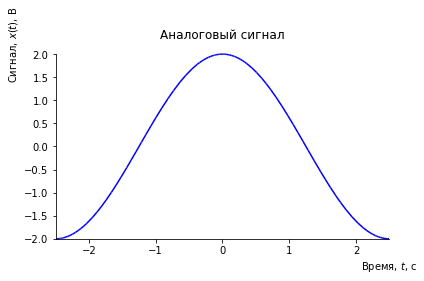

In [92]:
sig = A * cos(2 * pi * x * fz)  # Формирование значений

# Формирование графика
p = plot(sig, (x, tmin, tmax), line_color=tColor, show=False)
p.title = "Аналоговый сигнал"   # Заголовок
p.xlabel = r"Время, $\mathit{t}$, с"    # Надпись оси абсцисс
p.ylabel = r"Сигнал, $\mathit{x(t)}$, В"    # Надпись оси ординат
p.axis_center = (-2.5, -2.0)    # Положение осей графика
p.show()    # Отрисовка графика

### 1.3. Моделирование дискретного сигнала

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify

# отрисовка непосредственно в ноутбуке
%matplotlib inline

In [94]:
# Формирование области определения
td = np.linspace(tmin, tmax, int(np.round((tmax - tmin) * fd)))
sigdify = lambdify(x, sig)  # Формирование функции возвращающей значение символьной функции по аргументу х
xd = np.array([sigdify(i) for i in td]) # Преобразование символьного выражения в числовое

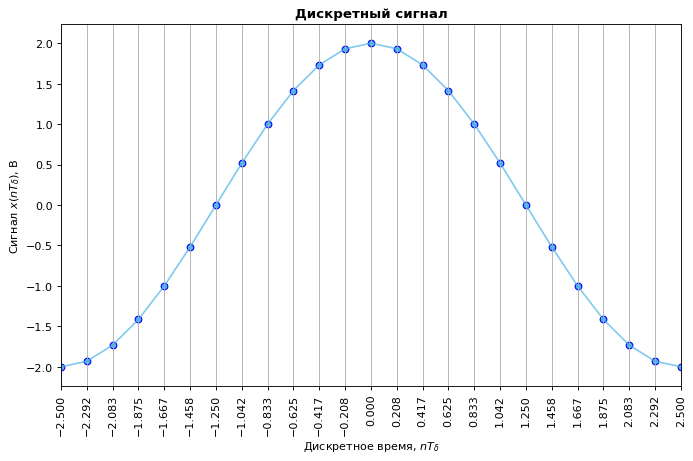

In [95]:
plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Задания размера картинки в дюймах и плотности пикселей
plt.title("Дискретный сигнал", fontweight="bold")   # Заголовок с жирным шрифтом
plt.ylabel(r"Cигнал $\mathit{x(nT_\delta)}$, В")    # Надпись оси ординат 
plt.xlabel(r"Дискретное время, $\mathit{nT_\delta}$")  # Надпись оси абсцисс
plt.xlim(tmin, tmax)    # Предел значений графика по оси абсцисс
plt.xticks(td, rotation=90)  # Шаг деления оси абсцисс 0.2
plt.grid(axis='x')  # Добавление вертикальных линий на график
plt.plot(td, xd, color=tColorLight, alpha=0.7)    # Соединение точек на графике
plt.scatter(td, xd, edgecolors=tColor, color=tColorLight) # Построение точечного графика

plt.show()  # Отображение графика

### 1.4. Моделирование квантованного сигнала

In [96]:
# Квантование х по левой или правой границе на основе модуля меньшего расстояния.
# Если расстояние одинаково до двух границ, то функция возвращает левую границу.

quantiz = lambda lbrace, rbrace, x: rbrace if np.abs(rbrace - x) < np.abs(lbrace - x) else lbrace

In [97]:
# Функция arange возвращает равномерно разделённый интервал с заданным количеством разбиений,
# НО не включает последнее значение (возвращает полуинтервал).
# Поэтому правая граница передана в arange больше на q.
# Последний элемент codebook бесконечно близок к правой границе,
# Поэтому для исключения дальнейших ошибок он приравнен к правой границе.

N = 2**b    # Количество уровней квантования
q = 2 * A / (N - 1) # Шаг квантования
codebook = np.arange(-A, A + q, q)  # Уровни квантования сигнала
codebook[-1] = A    # Изменения последнего элемента
ind = np.digitize(xd, codebook) # Получение индексов квантованного сигнала

# На основе полученных индексов формируются значения квантованного сигнала.
# Функция digitize возвращает индексы включая левую границу.
# При равенстве элемента правой границе функция возвращает номер последнего элемента + 1 (т.е. выходит за границы массива).
# Поэтому списковое включение(list comprehension) отлавливает данное поведение.

D = np.array([quantiz(codebook[ind[n] - 1], codebook[ind[n]], xd[n]) if ind[n] != codebook.size else quantiz(codebook[ind[n] - 2], codebook[ind[n] - 1], xd[n]) for n in range(ind.size)])

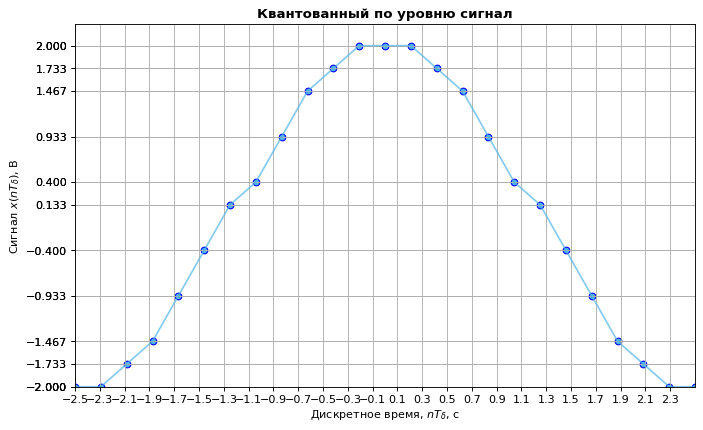

In [98]:
plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Задания размера картинки в дюймах и плотности пикселей
plt.title("Квантованный по уровню сигнал", fontweight="bold")   # Заголовок с жирным шрифтом
plt.ylabel(r"Cигнал $\mathit{x(nT_\delta)}$, В")    # Надпись оси ординат 
plt.xlabel(r"Дискретное время, $\mathit{nT_\delta}$, с")    # Надпись оси абсцисс
plt.xlim(tmin, tmax)    # Предел значений графика по оси абсцисс
plt.xticks(np.arange(tmin, tmax, 0.2))  # Шаг деления оси абсцисс 0.2
# plt.yticks(np.arange(D.min(), D.max() + 0.25, 0.25))    # Шаг деления оси ординат 0.25
plt.yticks(D)    # Шаг деления оси ординат 0.25
plt.ylim(D.min(), D.max() + 0.25)   # Предел значение по оси ординат
plt.grid(True)  # Добавление сетки на график
plt.scatter(td, D, color=tColorLight, edgecolors=tColor)  # Построение точечного графика
plt.plot(td, D, color=tColorLight, alpha=0.7) # Соединение точек на графике

plt.show()  # Отображение графика

### 1.5. Моделирование цифрового сигнала

In [99]:
dec2bin = lambda dec:(b - len(bin(dec)[2:])) * '0' + bin(dec)[2:] if b - len(bin(dec)[2:]) != 0 else bin(dec)[2:]

In [100]:
codes = np.arange(-N // 2, N // 2)  # Массив кодированных значений
bincodes = [dec2bin(N + el) + f" ({el})" if el < 0 else dec2bin(el) + f" ({el})" for el in codes]   # Перевод чисел в дополнительный код

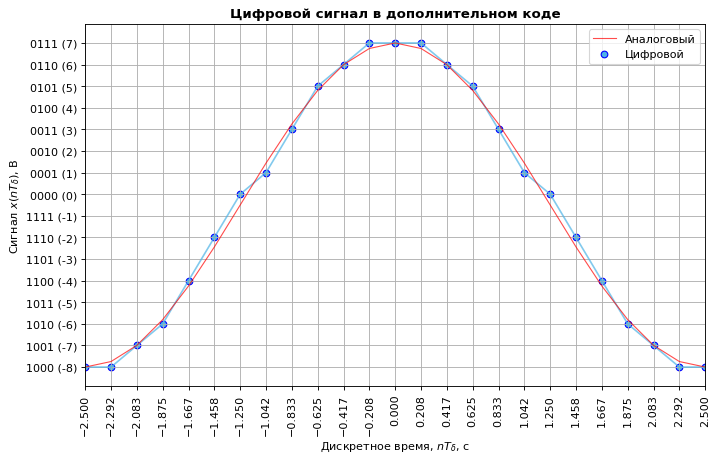

In [101]:
fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY)   # Задания размера картинки в дюймах и плотности пикселей
axis = plt.axes()   # Получение осей графика
plt.title("Цифровой сигнал в дополнительном коде", fontweight="bold")   # Заголовок с жирным шрифтом
plt.ylabel(r"Cигнал $\mathit{x(nT_\delta)}$, В")    # Надпись оси ординат 
plt.xlabel(r"Дискретное время, $\mathit{nT_\delta}$, с")    # Надпись оси абсцисс
plt.xlim(tmin, tmax)    # Предел значений графика по оси абсцисс
#plt.xticks(np.arange(tmin, tmax, 0.2), rotation=90)  # Шаг деления оси абсцисс 0.2
plt.xticks(td, rotation=90)  # Шаг деления оси абсцисс 0.2
plt.yticks(np.linspace(D.min(), D.max(), len(bincodes)))    # Деление оси ординат
axis.set_yticklabels(bincodes)  # Нанесение дополнительного кода на ось ординат
plt.grid(True)  # Добавление сетки на график
plt.scatter(td, D, color=tColorLight, edgecolors=tColor, label="Цифровой")  # Построение точечного графика
plt.plot(td, D, color=tColorLight, alpha=0.7) # Соединение точек на графике
plt.plot(td, xd, color=Color0, alpha=0.7, linewidth=1, label="Аналоговый") # Соединение точек на графике
plt.legend()

plt.show()  # Отображение графика

### 1.6. Вычисление абсолютной погрешности цифрового сигнала

In [102]:
ex = D - xd  # Формирование значений

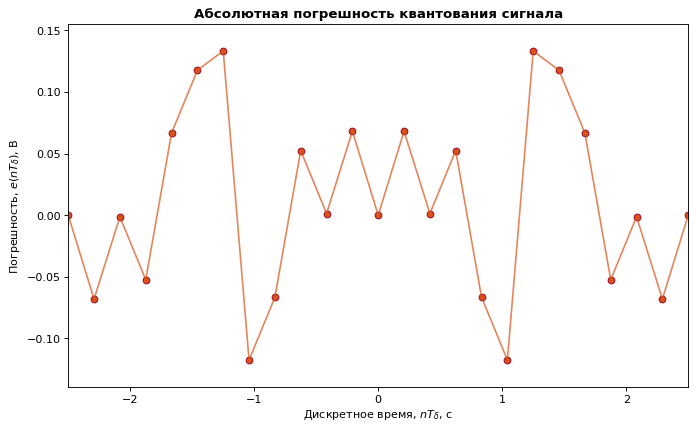

In [103]:
plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Задания размера картинки в дюймах и плотности пикселей
plt.title("Абсолютная погрешность квантования сигнала", fontweight="bold")  # Заголовок с жирным шрифтом
plt.ylabel(r"Погрешность, $\mathit{e(nT_\delta)}$, В")  # Надпись оси ординат 
plt.xlabel(r"Дискретное время, $\mathit{nT_\delta}$, с")   # Надпись оси абсцисс
plt.xlim(tmin, tmax)    # Предел значений графика по оси абсцисс
plt.scatter(td, ex, color=eColor, edgecolors=eColorDark) # Построение точечного графика
plt.plot(td, ex, color=eColor, alpha=0.7)    # Соединение точек на графике

plt.show()  # Отображение графика

In [104]:
nBars = 8   # Количество диапазонов отклонений
edges = np.linspace(-A / (N - 1), A / (N - 1), nBars)   # Формирование границ диапазонов

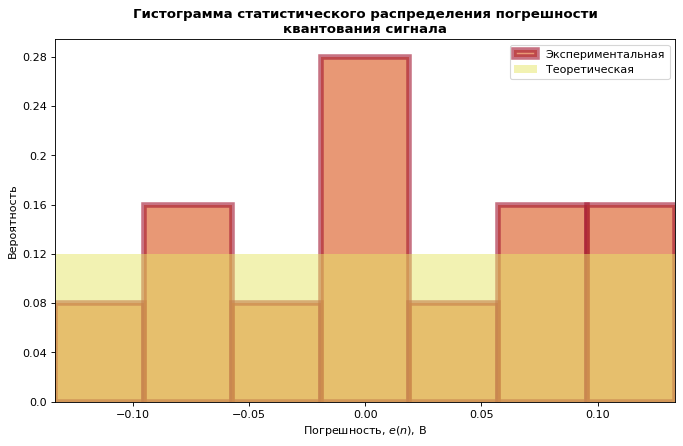

In [105]:
plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY)   # Задания размера картинки в дюймах и плотности пикселей
axis = plt.axes()   # Получение осей графика
plt.title("""Гистограмма статистического распределения погрешности
квантования сигнала""", fontweight="bold")  # Заголовок с жирным шрифтом
plt.ylabel("Вероятность")   # Надпись оси ординат 
plt.xlabel(r"Погрешность, $\mathit{e(n)}$, В")  # Надпись оси абсцисс
plt.xlim(edges[0], edges[-1])   # Пределы по оси абсцисс
an, bins, patchs = plt.hist(ex, edges, color=eColor, alpha=0.6, edgecolor=eColorDark, linewidth=5, label="Экспериментальная")
norm = np.array([np.random.uniform(edges[i], edges[i + 1]) for j in range(int(np.round(an.sum() / nBars))) for i in range(nBars - 1)])  # Рачёт нормализации
plt.hist(norm, edges, color=eColorLight, alpha=0.5, label="Теоретическая")
plt.legend()    # Добавление подписей к графикам

hist_sum = an.sum()
prob = np.array([el / hist_sum for el in an])   # Расчёт вероятностей
axis.set_yticklabels(np.linspace(0, prob.max(), an.size + 1))   # Нанесение вероятностей на ось ординат

plt.show()  # Отображение графика